<h1>My Attempt at UCB</h1>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [10]:
#####All this has been picked from the work I did on epsilon greedy method
##hopefully I haven't ignored any errors


#defining constants
#For UCB
c=[0.1,0.5,1,1.5,2]

k=10
N=2000
#first is purely exploitative then generally going towards explorative
eps=[0,0.01,0.1,0.9,1]
std_dev=1
#initialising the values of all arms
trueActionVals = []
for i in range(k):
    trueActionVals.append(np.random.random()*4 - 2)
trials=np.zeros((k,N))
#initialising the true action value array of each arm for each trial
for i in range(k):
    trueVal=trueActionVals[i]
    trials[i]=np.random.normal(trueVal,std_dev,N)


def runMAB(epsilon):
    #running trials with epsilon
    reward=np.zeros(N)
    Q_estT=np.zeros(k)
    f=np.zeros(k)
    index=np.zeros(N)
    for i in range(N):
        if np.random.random()>epsilon:
            action=np.argmax(Q_estT) #choose the greedy action
            #print(action)
            r=trials[action][i]
            reward[i]=reward[i-1]+r #updating the reward
            f[action]+=1
            Q_estT[action]=Q_estT[action]+(r-Q_estT[action])/f[action]
        else:
            action=math.floor(np.random.random()*k)
            # print(action)
            r=trials[action][i]
            reward[i]=reward[i-1]+r
            f[action]+=1
            Q_estT[action]=Q_estT[action]+(r-Q_estT[action])/f[action]
        index[i]=action
    return reward

In [16]:
def ucbImplement(c,epsilon):
    rew=np.zeros((N))  #reward for the trial
    Q_t = np.zeros(k)  #avg rew
    f = np.zeros(k)  #frequency
    index = np.zeros(N)
    for i in range(N):
        if np.random.random() > epsilon:
            a = np.argmax(Q_t + c*np.sqrt(np.log(i+1)/(f+1)))
            r = trials[a][i]
            rew[i] = rew[i-1] + r
            f[a] += 1
            Q_t[a] += (1/f[a])*(r - Q_t[a])
        else:
            a = math.floor(np.random.random()*10)
            r = trials[a][i]
            rew[i] = rew[i-1] + r
            f[a] += 1
            Q_t[a] += (1/f[a])*(r - Q_t[a])
        index[i] = a
#         print(Q_t)
    return rew

the term c*root(lnt/N_t(a)) adds a sort of exploration bonus to the estimated reward of choosing an action, so a higher value of c should encourage more and more exploration

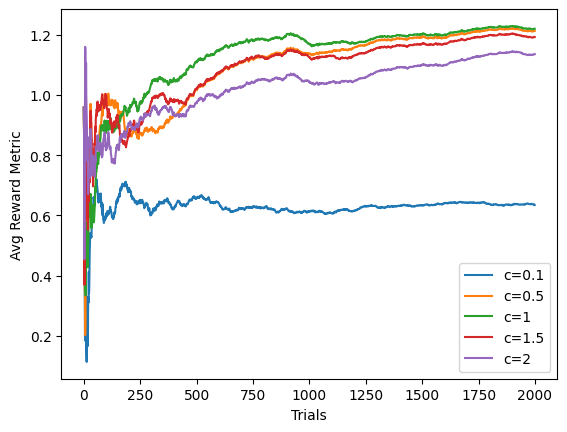

In [26]:
plt.figure(dpi=100)
plt.ylabel("Avg Reward Metric")
plt.xlabel("Trials")
plt.plot(np.arange(N),ucbImplement(c[0],0)/(np.arange(N)+1))
plt.plot(np.arange(N),ucbImplement(c[1],0)/(np.arange(N)+1))
plt.plot(np.arange(N),ucbImplement(c[2],0)/(np.arange(N)+1))
plt.plot(np.arange(N),ucbImplement(c[3],0)/(np.arange(N)+1))
plt.plot(np.arange(N),ucbImplement(c[4],0)/(np.arange(N)+1))
plt.legend(['c=0.1','c=0.5','c=1','c=1.5','c=2'])

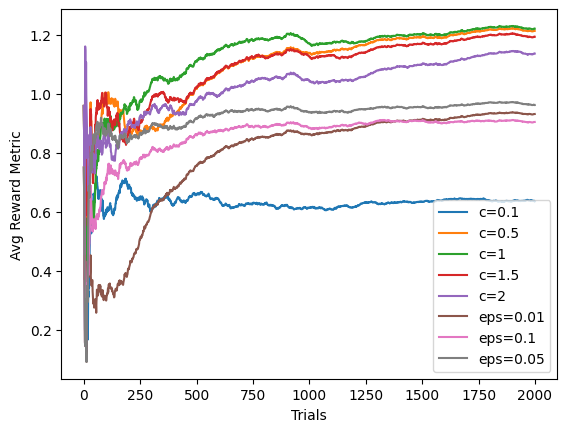

In [27]:
#Now comparing best epsilon greedy with some diff values of c

maxAvgRew=(np.arange(N)+1)*np.max(trueActionVals)

plt.figure(dpi=100)
plt.ylabel("Avg Reward Metric")
plt.xlabel("Trials")
plt.plot(np.arange(N),ucbImplement(c[0],0)/(np.arange(N)+1))
plt.plot(np.arange(N),ucbImplement(c[1],0)/(np.arange(N)+1))
plt.plot(np.arange(N),ucbImplement(c[2],0)/(np.arange(N)+1))
plt.plot(np.arange(N),ucbImplement(c[3],0)/(np.arange(N)+1))
plt.plot(np.arange(N),ucbImplement(c[4],0)/(np.arange(N)+1))
plt.plot(np.arange(N),runMAB(0.01)/maxAvgRew)
plt.plot(np.arange(N),runMAB(.1)/maxAvgRew)
plt.plot(np.arange(N),runMAB(.05)/maxAvgRew)
plt.legend(['c=0.1','c=0.5','c=1','c=1.5','c=2','eps=0.01','eps=0.1','eps=0.05'])